# Sumatra export

In [279]:
import json
import pandas
import numpy as np

!smt export
with open('.smt/records_export.json') as ff:
    data = json.load(ff)
    
with open('record1.json', 'w') as record1:
    for entry in range(len(data)):
        record1.write(json.dumps(data[entry], sort_keys=True, indent=4, separators=(',', ': ')))

df = pandas.DataFrame(data)  #df is now the sumatra dataframe

In [192]:
print df.iloc[5]['stdout_stderr']

my params: {u'duration': 5000, u'N': 200, u'steps': 3000, u'sweeps': 8, u'sumatra_label': u'3ea82cfb13ea'}
Starting Solver.
10
0.15937424601
20
0.572749994933
26
1.0
30
1.50283870283
40
4.03100718459
43
5.0
50
9.72320526599
51
10.0
59
20.0
60
21.5124731398
70
37.2695931749
80
58.1169765057
90
83.9852871534
96
100.0
100
111.887406763
110
142.882945744
120
175.087227169
128
200.0
130
206.373897869
140
240.162241797
150
273.735841456
160
308.615480381
170
343.287885478
180
378.506723734
190
414.284925746
200
449.832434157
210
485.969070382
214
500.0
220
522.142876646
230
559.221929993
240
596.051201221
250
633.465413931
260
670.638384237
270
706.780350781
280
742.671469601
290
777.550482756
300
811.442225128
310
845.121656501
320
878.580781117
330
910.369523545
340
940.58143203
350
968.652863172
360
994.769501614
362
1000.0
370
1019.84571965
380
1041.75356285
390
1062.10646804
400
1079.40475894
410
1095.85713207
420
1109.84029238
430
1122.25414524
440
1137.61844105
450
1170.69693856
460
1

In [349]:
#51d8344546dd row 4 = 32 sweeps
#63347dc92f3f row 5 = 16 sweeps
#f1c316514546 row 6

df.loc[5]['parameters']

{u'content': u'{\n    "N": 400, \n    "duration": 5000, \n    "steps": 200, \n    "sumatra_label": "63347dc92f3f", \n    "sweeps": 16\n}',
 u'type': u'JSONParameterSet'}

# Extractor() : 

This method finds the simulations which have ".mpz.npz" files in their Data/ folder and gets all the information out of those files into a dataframe


In [216]:
p = str(df['datastore'][0]['parameters']['root'])
p = p[:-13]
print p
# datapath = os.path.join(p, '3ea82cfb13ea')
# mfile = glob.glob('{0}/*.mpz.npz'.format(datapath))

# # for mpzfile in mfile:
# fn = np.load(mfile[0])
# for item in fn:
#     print item, ' = ', fn[item]
        
# print mfile

/data/aem1/new1a/cluster-sumatra-sims/Data


In [287]:
import glob
import os
import fipy as fp

# print df['output_data'][0][-2]['path']
# df['datastore'][0]['parameters']['root']  #alternative method to get data directory

labels = []

labels = df['label']
# labels = ['fafbeb433621', 'd88bca02dcc7', '555a1eed5f55', '87010a682e4d', '7eff0b0d7455', 'd5ba58775177', '8851d4ef0b49', '9656864915ad', 'bc94d63e65a8' ] #I manually entered simulations that were ok
print labels

dfC = pandas.DataFrame(columns=['label','steps','elapsed', 'nx', 'ny', 'c_var_array', 'cvar_Interpolated_Function', 'dt', 'dx', 'dy', 'sweeps', 'L1', 'L2', 'Linf'])

def extractor(labelz, Lx=200.):  
    rows = 0
    for lbl in labelz:
        dictt = {} #create a dictionary to fill in with simulation data
        dictt.update({'label':lbl})
        p = str(df['datastore'][0]['parameters']['root'])
        p = p[:-13] #cuts off the sumatra label from the datapath
        datapath = os.path.join(p, lbl)
        mfile = glob.glob('{0}/*.mpz.npz'.format(datapath)) #get the name of the mpz file with data we need
#         print mfile
        if len(mfile)>=1:
            for mpzfile in mfile:
                fn = np.load(mpzfile)
                for item in fn:
                    dictt.update({str(item):fn[item]}) #add every variable from the file into the dictionary
                dictt.update({'cvar_Interpolated_Function':None}) #create a blank column for later
                dictt.update({'L1':[]})
                dictt.update({'L2':[]})
                dictt.update({'Linf':[]})
                dictt['elapsed']=dictt['elapsed']+dictt['dt'] #When I saved the files, I subtracted dt

                #now we need the x and y coordinates for interpolation to match the grid size
                nx = dictt['nx']
                ny = dictt['ny']

#                 print dictt.keys()
#                 print rows
                dfC.loc[rows]=dictt        
                rows+=1
    return dfC #dfC is a compact dataframe with all the information we need
        
extractor(labels)

0     a45690313727
1     5c4434ccd256
2     1b69921762d7
3     e294583f95a6
4     51d8344546dd
5     63347dc92f3f
6     3ea82cfb13ea
7     2e8f28c2904c
8     f1c316514546
9     9a98c389d8c2
10    3c08d6f123cc
11    509812ef5230
Name: label, dtype: object


,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf
0,a45690313727,26,1.016529,100,100,"[0.516982487929, 0.5227468515, 0.52091822422, ...",None,0.0165294056612,2.0,2.0,1,[],[],[]
1,a45690313727,43,5.104952,100,100,"[0.538724469778, 0.551849762143, 0.55002994639...",None,0.104952481839,2.0,2.0,1,[],[],[]
2,a45690313727,51,10.453190,100,100,"[0.58370926951, 0.601721802393, 0.601066378646...",None,0.45318970453,2.0,2.0,1,[],[],[]
3,a45690313727,70,20.008379,100,100,"[0.592711891262, 0.606596498292, 0.60525664413...",None,0.00837892317701,2.0,2.0,1,[],[],[]
4,a45690313727,225,100.419435,100,100,"[0.585087183355, 0.553986366109, 0.50879829135...",None,0.419434879752,2.0,2.0,1,[],[],[]
5,a45690313727,441,200.199270,100,100,"[0.53689968002, 0.504271031369, 0.462740833233...",None,0.199270162579,2.0,2.0,1,[],[],[]
6,a45690313727,1114,500.113097,100,100,"[0.445047584935, 0.416370460616, 0.38882600757...",None,0.113096891212,2.0,2.0,1,[],[],[]
7,a45690313727,2240,1000.017055,100,100,"[0.678177482185, 0.680310042789, 0.67883868498...",None,0.0170548977446,2.0,2.0,1,[],[],[]
8,a45690313727,4570,2000.266780,100,100,"[0.687410684734, 0.688198866427, 0.68814366820...",None,0.266779710768,2.0,2.0,1,[],[],[]
9,5c4434ccd256,25,1.000000,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,3,[],[],[]


Remove any unwanted simulations from the dataframe

In [303]:
print np.unique(dfC['sweeps'])
dfC_sweepTemp = dfC.query('(sweeps == 1) or (sweeps == 3) or (sweeps == 5) or (sweeps == 7)')
#Simulation 509812ef5230 was redone with simulation 3c08d6f123cc due to faulty file saving
dfC_sweepTemp2 = dfC_sweepTemp.query('(label != "509812ef5230")')
#created a tempory frame without the simulations at 15 or 31 sweeps

for index, row in dfC_sweepTemp2.iterrows():
    #fix the number of sweeps, it saved sweeps-1 due to range(total_sweeps) loop in simulation file
    dfC_sweepTemp2.loc[index, 'sweeps'] = dfC_sweepTemp2.loc[index, 'sweeps']+1
    
    #now fix the elapsed time for the newest simulation, elapsed is now saved properly so I have to adjust back
    if row['label'] == 'a45690313727':
        dfC_sweepTemp2.loc[index, 'elapsed'] = dfC_sweepTemp2.loc[index, 'elapsed'] - dfC_sweepTemp2.loc[index, 'dt']
    #now fix the 100-7-200 simulation elapsed time 
    if row['label'] == '2e8f28c2904c' and row['steps'] == int(151) and row['sweeps'] == int(7):
        dfC_sweepTemp2.loc[index, 'elapsed'] = float(200.0)
        print 'Elapsed time for ', row['nx'], '-', row['sweeps'], ' is now ', dfC_sweepTemp2.loc[index, 'elapsed']


print dfC_sweepTemp2.loc[64]['elapsed']        
dfC_sweepTemp2

[array(1) array(3) array(5) array(7) array(15) array(31)]
Elapsed time for  100 - 7  is now  200.0
200.0


,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf
0,a45690313727,26,1.0,100,100,"[0.516982487929, 0.5227468515, 0.52091822422, ...",None,0.0165294056612,2.0,2.0,2,[],[],[]
1,a45690313727,43,5.0,100,100,"[0.538724469778, 0.551849762143, 0.55002994639...",None,0.104952481839,2.0,2.0,2,[],[],[]
2,a45690313727,51,10.0,100,100,"[0.58370926951, 0.601721802393, 0.601066378646...",None,0.45318970453,2.0,2.0,2,[],[],[]
3,a45690313727,70,20.0,100,100,"[0.592711891262, 0.606596498292, 0.60525664413...",None,0.00837892317701,2.0,2.0,2,[],[],[]
4,a45690313727,225,100.0,100,100,"[0.585087183355, 0.553986366109, 0.50879829135...",None,0.419434879752,2.0,2.0,2,[],[],[]
5,a45690313727,441,200.0,100,100,"[0.53689968002, 0.504271031369, 0.462740833233...",None,0.199270162579,2.0,2.0,2,[],[],[]
6,a45690313727,1114,500.0,100,100,"[0.445047584935, 0.416370460616, 0.38882600757...",None,0.113096891212,2.0,2.0,2,[],[],[]
7,a45690313727,2240,1000.0,100,100,"[0.678177482185, 0.680310042789, 0.67883868498...",None,0.0170548977446,2.0,2.0,2,[],[],[]
8,a45690313727,4570,2000.0,100,100,"[0.687410684734, 0.688198866427, 0.68814366820...",None,0.266779710768,2.0,2.0,2,[],[],[]
9,5c4434ccd256,25,1.0,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,4,[],[],[]


Found a recurring issue of an elapsed time not being exactly one of the dump times, dont know why

In [323]:
# dfC_sweepTemp.loc[40:60]

# dfC_100_5 = dfC_sweepTemp2.query('(nx==100) and (sweeps==5)')
# dfC_100_5

dfC_8sweeps = dfC_sweepTemp2.query('(sweeps==8)')
dfC_8sweeps 

#for some reason, the 100-7-199.349588 simulation exists instead of the elapsed being 200 (ROW 55)
#maybe try to replicate this issue by running a N=100 Sweeps=7 Duration=500 simulation

,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf
49,3ea82cfb13ea,25,1.0,200,200,"[0.509670889553, 0.513126434528, 0.51551541071...",None,0.0165294056612,1.0,1.0,8,5.54243,0.0411642,0.00155884
50,3ea82cfb13ea,42,5.0,200,200,"[0.521258865461, 0.529565200051, 0.53545141064...",None,0.104952481839,1.0,1.0,8,22.157,0.129578,0.00431597
51,3ea82cfb13ea,50,10.0,200,200,"[0.551981552599, 0.5659693304, 0.57598114342, ...",None,0.276794734012,1.0,1.0,8,130.042,0.546855,0.0105911
52,3ea82cfb13ea,58,20.0,200,200,"[0.558014740905, 0.564466059642, 0.56884486415...",None,1.45204747713,1.0,1.0,8,523.875,1.59821,0.027044
53,3ea82cfb13ea,95,100.0,200,200,"[0.511040509808, 0.495914659022, 0.47940986930...",None,2.18424417261,1.0,1.0,8,1844.29,14.145,0.370599
54,3ea82cfb13ea,127,200.0,200,200,"[0.43990112965, 0.422903103616, 0.406389455929...",None,1.8482713782,1.0,1.0,8,2785,20.0467,0.384797
55,3ea82cfb13ea,213,500.0,200,200,"[0.336872643499, 0.32789087846, 0.321223952111...",None,3.57284060247,1.0,1.0,8,5303.09,32.1234,0.393766
56,3ea82cfb13ea,361,1000.0,200,200,"[0.310912632217, 0.308889747218, 0.30746893010...",None,2.71307523448,1.0,1.0,8,8326.78,44.6345,0.396324
57,3ea82cfb13ea,722,2000.0,200,200,"[0.303982719395, 0.303291504466, 0.30285676223...",None,3.92993687477,1.0,1.0,8,10840,54.12,0.39644
58,3ea82cfb13ea,953,3000.0,200,200,"[0.318591342166, 0.341301150978, 0.38500009056...",None,4.63852241667,1.0,1.0,8,12951.3,61.901,0.396949


# cvar Interpolation

The method below will take the datafram which is created by the extractor() above and save the interpolation function into the dataframe

In [330]:
def Figures_of_Merit(dframe, Lx=200.):
    Lx = float(Lx)
    N_Best = 0
    sweeps_Best = 0
    c_var_Best = {}
    results = {}
    simulations = []
    full_keys = []
    key_Best = ''
    for index, row in dframe.iterrows():
        if row['nx'] > N_Best:
            N_Best = row['nx']
            sweeps_Best = row['sweeps']
        elif row['nx'] == N_Best and row['sweeps'] > sweeps_Best:
            sweeps_Best = row['sweeps']
                    
        key_Best = '{0}-{1}'.format(N_Best,sweeps_Best)
        print key_Best

        key = '{0}-{1}-{2}'.format(row['nx'], row['sweeps'], row['elapsed'])
        print key
        sim_key = '{0}-{1}'.format(row['nx'], row['sweeps'])
        if sim_key not in simulations: simulations.append(sim_key)
        if key not in full_keys: full_keys.append(key)
        results[key] = {'c_var': np.array(row['c_var_array'])}
            
    simulations.append(key_Best)
    print 'Best simulation has been found!'
    for key, value in results.iteritems():
        mesh_int = fp.Grid2D(nx=N_Best, ny=N_Best, dx=Lx / N_Best, dy=Lx / N_Best)
        N_sweeps_elapsed = key.split('-')
        N_sweeps_elapsed[0] = int(N_sweeps_elapsed[0])
        N_sweeps_elapsed[1] = int(N_sweeps_elapsed[1])
        m = fp.Grid2D(nx=N_sweeps_elapsed[0], ny=N_sweeps_elapsed[0], dx=Lx / N_sweeps_elapsed[0], dy=Lx / N_sweeps_elapsed[0])
        
        v = fp.CellVariable(mesh=m)
#         print value
        v[:] = value['c_var'][:]
        v_int = fp.CellVariable(mesh=mesh_int)
#         print N_Best, Lx / N_Best, Lx
#         print v.mesh.x[:10]
#         print v.mesh.y[:10]
#         print v_int.mesh.x[:10]
#         print v_int.mesh.y[:10]
        v_int[:] = v((mesh_int.x, mesh_int.y), order=1)
        
        elaps_cvar_Best = '{0}-{1}'.format(key_Best, N_sweeps_elapsed[2])
        print 'Simulation: ', N_sweeps_elapsed
        print elaps_cvar_Best
#         print ' '
#         print 'CHECK CHECK CHECK'
#         print 'Current key: ', key
#         print 'Corresponding Best Key :', elaps_cvar_Best
#         print 'The results of Best Key entry in dictionary: ', results[elaps_cvar_Best]
#         print '***The interpolated values : ', v_int
#         print 'content of testing array: ', v
#         print 'length of best array: ', len(v_int)
#         print '*******'
        diff_cvar_Best = np.absolute(results[elaps_cvar_Best]['c_var'] - v_int)
        print 'The diff of {0} with {1}: '.format(key, elaps_cvar_Best), diff_cvar_Best
        value['L1'] = np.linalg.norm(diff_cvar_Best,1)
        value['L2'] = np.linalg.norm(diff_cvar_Best,2)
        value['Linf'] = np.linalg.norm(diff_cvar_Best,np.inf)
        
    for index, row in dframe.iterrows():
            print 'Key: ', key, 'Row Index: ', index, 'type(index) = ', type(index)
            key = '{0}-{1}-{2}'.format(row['nx'], row['sweeps'], row['elapsed'])
            dframe.loc[index, 'L1'] = results[key]['L1']
            dframe.loc[index, 'L2'] = results[key]['L2']
            dframe.loc[index, 'Linf'] = results[key]['Linf']
            
#             row[1]['L1'] = results[key]['L1']
#             row[1]['L2'] = results[key]['L2']
#             row[1]['Linf'] = results[key]['Linf']
#             print "Results are: ", results[key]
            print '-'*100
            print row[1]
#         else:
#             row[1]['L1'] = 0
#             row[1]['L2'] = 0
#             row[1]['Linf'] = 0

    best_key = '{0}-{1}'.format(N_Best, sweeps_Best)
    print '='*100
    print dframe['L1']
    return best_key, simulations, full_keys, dframe


In [327]:
#Manually change the problem value for one of the simulations
# pandas.options.mode.chained_assignment = None
# dfC_sweepTemp.loc[55]['elapsed']=float(200.0)
# dfC_sweepTemp.iloc[43]['elapsed']=float(200.0)

# dfC_sweepTemp2.elapsed[55]=float(200.0)
# dfC_sweepTemp2.loc[55]['elapsed']
dfC_sweepTemp2

,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf
0,a45690313727,26,1.0,100,100,"[0.516982487929, 0.5227468515, 0.52091822422, ...",None,0.0165294056612,2.0,2.0,2,24.7367,0.176435,0.00723931
1,a45690313727,43,5.0,100,100,"[0.538724469778, 0.551849762143, 0.55002994639...",None,0.104952481839,2.0,2.0,2,105.876,0.555194,0.0175737
2,a45690313727,51,10.0,100,100,"[0.58370926951, 0.601721802393, 0.601066378646...",None,0.45318970453,2.0,2.0,2,645.309,2.5153,0.0422254
3,a45690313727,70,20.0,100,100,"[0.592711891262, 0.606596498292, 0.60525664413...",None,0.00837892317701,2.0,2.0,2,2148.55,6.82114,0.100033
4,a45690313727,225,100.0,100,100,"[0.585087183355, 0.553986366109, 0.50879829135...",None,0.419434879752,2.0,2.0,2,4765.03,22.5262,0.371436
5,a45690313727,441,200.0,100,100,"[0.53689968002, 0.504271031369, 0.462740833233...",None,0.199270162579,2.0,2.0,2,6452.83,31.0064,0.379687
6,a45690313727,1114,500.0,100,100,"[0.445047584935, 0.416370460616, 0.38882600757...",None,0.113096891212,2.0,2.0,2,10652.9,47.3017,0.387673
7,a45690313727,2240,1000.0,100,100,"[0.678177482185, 0.680310042789, 0.67883868498...",None,0.0170548977446,2.0,2.0,2,15249.6,63.1561,0.389738
8,a45690313727,4570,2000.0,100,100,"[0.687410684734, 0.688198866427, 0.68814366820...",None,0.266779710768,2.0,2.0,2,20892.7,79.9988,0.394447
9,5c4434ccd256,25,1.0,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,4,24.7367,0.176435,0.00723931


In [331]:
best_key, simulations, all_keys, dfC_final = Figures_of_Merit(dfC_sweepTemp2)
#sweepTemp frame does not have the simulations that ran a 15 or 31 sweeps

100-2
100-2-1.0
100-2
100-2-5.0
100-2
100-2-10.0
100-2
100-2-20.0
100-2
100-2-100.0
100-2
100-2-200.0
100-2
100-2-500.0
100-2
100-2-1000.0
100-2
100-2-2000.0
100-4
100-4-1.0
100-4
100-4-5.0
100-4
100-4-10.0
100-4
100-4-20.0
100-4
100-4-100.0
100-4
100-4-200.0
100-4
100-4-500.0
100-4
100-4-1000.0
100-4
100-4-2000.0
100-4
100-4-3000.0
200-2
200-2-1.0
200-2
200-2-5.0
200-2
200-2-10.0
200-2
200-2-20.0
200-2
200-2-100.0
200-2
200-2-200.0
200-2
200-2-500.0
200-2
200-2-1000.0
200-4
200-4-1.0
200-4
200-4-5.0
200-4
200-4-10.0
200-4
200-4-20.0
200-4
200-4-100.0
200-4
200-4-200.0
200-4
200-4-500.0
200-4
200-4-1000.0
200-4
200-4-2000.0
200-4
200-4-3000.0
200-8
200-8-1.0
200-8
200-8-5.0
200-8
200-8-10.0
200-8
200-8-20.0
200-8
200-8-100.0
200-8
200-8-200.0
200-8
200-8-500.0
200-8
200-8-1000.0
200-8
200-8-2000.0
200-8
200-8-3000.0
200-8
100-8-1.0
200-8
100-8-5.0
200-8
100-8-10.0
200-8
100-8-20.0
200-8
100-8-100.0
200-8
100-8-200.0
200-8
100-8-500.0
200-8
100-8-1000.0
200-8
100-8-2000.0
200-8
100-8-30

In [345]:
# print best_key
# print all_keys
dfC_final
dfC_100norms = dfC_final.query('(nx==400)')
dfC_100norms


,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf
69,f1c316514546,25,1.0,400,400,"[0.50689734786, 0.508564866228, 0.510109661285...",None,0.0165294056612,0.5,0.5,6,0,0,0
70,f1c316514546,42,5.0,400,400,"[0.513543342906, 0.517738201414, 0.52159939041...",None,0.104952481839,0.5,0.5,6,0,0,0
71,f1c316514546,50,10.0,400,400,"[0.533933821783, 0.541600078904, 0.54863071762...",None,0.276794734012,0.5,0.5,6,0,0,0
72,f1c316514546,59,20.0,400,400,"[0.536540702059, 0.539523138892, 0.54223118852...",None,0.801149945602,0.5,0.5,6,0,0,0
73,f1c316514546,98,100.0,400,400,"[0.489726859724, 0.48241976662, 0.474855755643...",None,2.00619387245,0.5,0.5,6,0,0,0
74,f1c316514546,135,200.0,400,400,"[0.426262002981, 0.417708767251, 0.40931321820...",None,1.20026053821,0.5,0.5,6,0,0,0
75,f1c316514546,236,500.0,400,400,"[0.335945873366, 0.330729685505, 0.32622744130...",None,2.0998383531,0.5,0.5,6,0,0,0
76,f1c316514546,396,1000.0,400,400,"[0.307137567413, 0.306086461821, 0.30521924044...",None,0.734662909636,0.5,0.5,6,0,0,0
77,f1c316514546,778,2000.0,400,400,"[0.299846076916, 0.299813910195, 0.29978160225...",None,2.17536154534,0.5,0.5,6,0,0,0
78,f1c316514546,1084,3000.0,400,400,"[0.298853820337, 0.298778752492, 0.29870196499...",None,0.266667894654,0.5,0.5,6,0,0,0


# Plot the Norms for various grid sizes to compare how sweeps affect Norms

['100-2', '100-4', '200-2', '200-4', '200-8', '100-8', '400-6', '200-6', '100-6', '400-6']
yay
yay


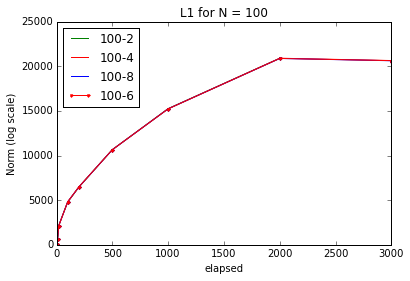

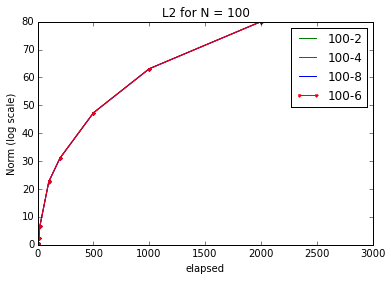

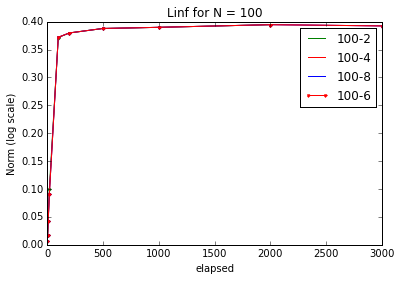

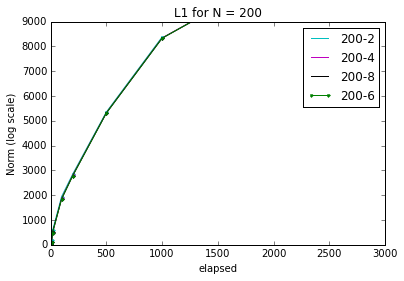

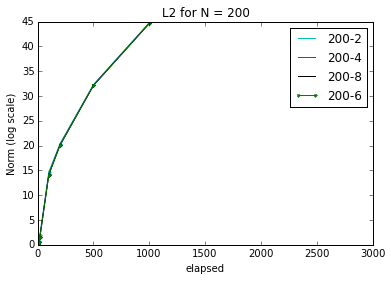

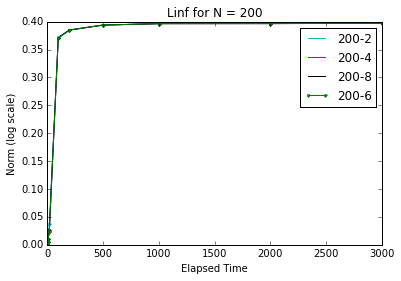

In [342]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk').next

print simulations

best_nx, best_sweeps = best_key.split('-')
temp_frame = dfC_final.query('(nx == {0}) & (sweeps == {1})'.format(best_nx, best_sweeps))
color = cycol()
# ax = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.')
# temp_frame.plot('elapsed', 'L2', kind='line', ax = ax, ylim=0, c=color, marker='o')
# temp_frame.plot('elapsed', 'Linf', kind='line', ax = ax, ylim=0, c=color, marker='*')

graph_grids = []
for key in simulations:
    if key != best_key:
        nx, sweeps = key.split('-')
#         print 'Cells = ', nx
#         print 'Sweeps = ', sweeps
        color = cycol()
        temp_frame = dfC_final.query('(nx == {0}) & (sweeps == {1})'.format(nx, sweeps))
        if nx not in graph_grids:
            print 'yay'
            graph_grids.append(nx)
            if int(nx)==100:
#                 print '100 yayyyyyyyyyyyyyyyyyyy'
                grids_100_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 100', label=key)
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
                grids_100_L1.set_xlabel('Norm (log scale)')                

                grids_100_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.',
                                               title='L2 for N = 100', label=key)
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
                grids_100_L2.set_xlabel('Norm (log scale)')                

                grids_100_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.',
                                                 title='Linf for N = 100', label=key)
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
                grids_100_Linf.xaxis.set_label('Norm (log scale)')                

#                 grids_100_L1.set_xlim((0,1000))
#                 grids_100_L2.set_xlim((0,1000))
#                 grids_100_Linf.set_xlim((0,1000))
            if int(nx)==200:
#                 print '200 yay'
                grids_200_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 200', label=key) #, logy=True
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
            
                grids_200_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 200', label=key) #, logy=True
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
                
                grids_200_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 200', label=key) #, logy=True
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
                
            if int(nx)==400:
#                 print '400 yay'
                grids_400_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 400', label=key)
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
            
                grids_400_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 400', label=key)
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
                
                grids_400_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 400', label=key)
                plt.ylabel('Norm (log scale)')
                plt.xlabel('Elapsed Time')
        else:
            if int(nx)==100:
#                 print 'eleeeeeeeeee yay'
                temp_frame.plot('elapsed', 'L1', ax = grids_100_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 100', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_100_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 100', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_100_Linf, kind='line', ylim=0, c=color, marker='.', 
                                                title='Linf for N = 100', label=key)
            
                axes100 = plt.gca()
                # recompute the ax.dataLim
                axes100.relim()
                # update ax.viewLim using the new dataLim
                axes100.autoscale_view()
                plt.draw()

            if int(nx)==200:
                temp_frame.plot('elapsed', 'L1', ax = grids_200_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 200', label=key)
                axes200L1 = grids_200_L1.get_axes()
                # recompute the ax.dataLim
                axes200L1.relim()
                # update ax.viewLim using the new dataLim
                axes200L1.autoscale_view()
                plt.draw()
                
                
                temp_frame.plot('elapsed', 'L2', ax = grids_200_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 200', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_200_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 200', label=key)
            if int(nx)==400:
                temp_frame.plot('elapsed', 'L1', ax = grids_400_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 400', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_400_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 400', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_400_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 400', label=key)

axplt = plt.gca()
axplt
grids_100_L1.xaxis.set_label('Norm (log scale)')                
plt.ylabel('Norm (log scale)')
plt.xlabel('Elapsed Time')
# plt.legend()
plt.show()
            

In [344]:
?grids_200_L1.get_axes()
?plt.gca()

# Plot Norms for various sweeps 

to compare the Norms for various grid sizes at specific sweeps and elapsed time

In [79]:
print all_keys
print type(best_key)

['100-3-1.0', '100-3-5.0', '100-3-10.0', '100-3-20.0', '100-3-100.0', '100-3-200.0', '100-3-500.0', '100-2-1.0', '100-2-5.0', '100-2-10.0', '100-2-20.0', '100-2-100.0', '100-2-200.0', '100-2-500.0', '100-1-1.0', '100-1-5.0', '100-1-10.0', '100-1-20.0', '100-1-100.0', '100-1-200.0', '400-3-1.0', '400-3-5.0', '400-3-10.0', '400-3-20.0', '400-3-100.0', '400-3-200.0', '400-3-500.0', '400-1-1.0', '400-1-5.0', '400-1-10.0', '400-1-20.0', '400-1-100.0', '400-2-1.0', '400-2-5.0', '400-2-10.0', '400-2-20.0', '400-2-100.0', '400-2-200.0', '400-2-500.0']
<type 'str'>


['100-3-1.0', '100-3-5.0', '100-3-10.0', '100-3-20.0', '100-3-100.0', '100-3-200.0', '100-3-500.0', '100-2-1.0', '100-2-5.0', '100-2-10.0', '100-2-20.0', '100-2-100.0', '100-2-200.0', '100-2-500.0', '100-1-1.0', '100-1-5.0', '100-1-10.0', '100-1-20.0', '100-1-100.0', '100-1-200.0', '400-3-1.0', '400-3-5.0', '400-3-10.0', '400-3-20.0', '400-3-100.0', '400-3-200.0', '400-3-500.0', '400-1-1.0', '400-1-5.0', '400-1-10.0', '400-1-20.0', '400-1-100.0', '400-2-1.0', '400-2-5.0', '400-2-10.0', '400-2-20.0', '400-2-100.0', '400-2-200.0', '400-2-500.0']
           label steps elapsed   nx   ny  \
0   fafbeb433621    26     1.0  100  100   
1   fafbeb433621    43     5.0  100  100   
2   fafbeb433621    51    10.0  100  100   
3   fafbeb433621    62    20.0  100  100   
4   fafbeb433621   107   100.0  100  100   
5   fafbeb433621   168   200.0  100  100   
6   fafbeb433621   291   500.0  100  100   
20  87010a682e4d    26     1.0  400  400   
21  87010a682e4d    43     5.0  400  400   
22  87010a

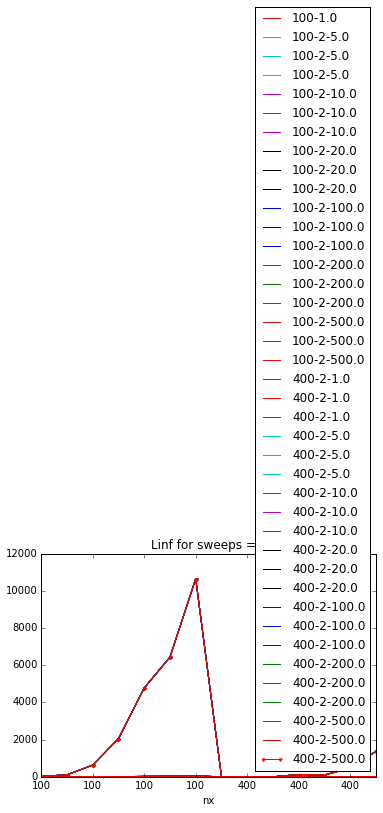

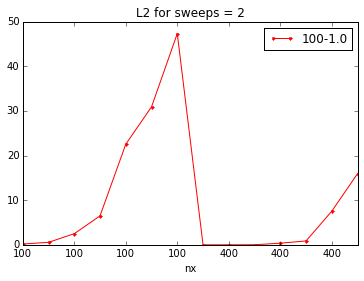

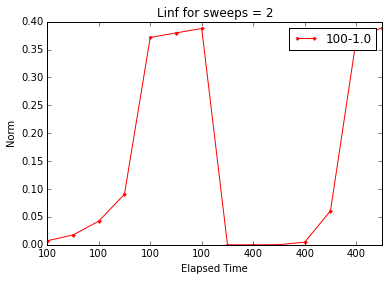

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk').next

print all_keys

best_nx, best_sweeps = best_key.split('-')
temp_best_frame = dfC_final.query('(nx == {0}) & (sweeps == {1})'.format(best_nx, best_sweeps))
color = cycol()
# ax = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.')
# temp_frame.plot('elapsed', 'L2', kind='line', ax = ax, ylim=0, c=color, marker='o')
# temp_frame.plot('elapsed', 'Linf', kind='line', ax = ax, ylim=0, c=color, marker='*')

graphed_keys = []
for key in all_keys:
#     print 'KEYS:', key[:5], ' ', best_key
    if key[:5]!=best_key:
        nx, sweeps, elaps = key.split('-')
#         print 'Cells = ', nx
#         print 'Sweeps = ', sweeps
        color = cycol()
        temp_frame = dfC_final.query('(sweeps == {1})'.format(elaps, sweeps))  #(elapsed == {0}) &
        print temp_frame
#         sweeps_elaps = '{0}-{1}'.format(sweeps, elaps)
        if sweeps not in graphed_keys:
            print 'yay'
            graphed_keys.append(sweeps)
            if int(sweeps)==2:
#                 print '100 yayyyyyyyyyyyyyyyyyyy'
                sweeps_2_L1 = temp_frame.plot('nx', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for sweeps = 2', label='{0}-{1}'.format(nx, elaps))
                sweeps_2_L2 = temp_frame.plot('nx', 'L2', kind='line', ylim=0, c=color, marker='.',
                                               title='L2 for sweeps = 2', label='{0}-{1}'.format(nx, elaps))
                sweeps_2_Linf = temp_frame.plot('nx', 'Linf', kind='line', ylim=0, c=color, marker='.',
                                                 title='Linf for sweeps = 2', label='{0}-{1}'.format(nx, elaps))
            
                grids_100_L1.set_xlim((0,1000))
                grids_100_L2.set_xlim((0,1000))
                grids_100_Linf.set_xlim((0,1000))
            if int(nx)==200:
#                 print '200 yay'
                grids_200_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 200', label=key)
                grids_200_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 200', label=key)
                grids_200_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 200', label=key)
            if int(nx)==400:
#                 print '400 yay'
                grids_400_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 400', label=key)
                grids_400_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 400', label=key)
                grids_400_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 400', label=key)
        else:
            if int(sweeps)==2:
#                 print 'eleeeeeeeeee yay'
                temp_frame.plot('nx', 'L1', ax = sweeps_2_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for sweeps = 2', label=key)
                temp_frame.plot('nx', 'L2', ax = sweeps_2_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for sweeps = 2', label=key)
                temp_frame.plot('nx', 'Linf', ax = sweeps_2_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for sweeps = 2', label=key)
            if int(nx)==200:
                temp_frame.plot('elapsed', 'L1', ax = grids_200_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 200', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_200_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 200', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_200_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 200', label=key)
            if int(nx)==400:
                temp_frame.plot('elapsed', 'L1', ax = grids_400_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 400', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_400_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 400', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_400_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 400', label=key)
                
    
plt.ylabel('Norm')
plt.xlabel('Elapsed Time')
plt.legend()
plt.show()
            

# cvar Figures of Merit

Now we have everything we need in the dataframe and can compare the different grid sizes, calculate L2 using cvar etc

# Free Energy Interpolation

For this section, we have to take the elapsed time and cvar from each step file, calculate the energy at that step, then interpolate the array of energies along with time. Save the intepolated function into the SUMATRA dataframe

In [223]:
energyFunctions = []
energyFunctions.append(None)
print energyFunctions
print ' '
for row in df.iterrows():
    print row[1]['label']
    
df

#How to select a specific row and then you can change the values in it's columns
df.loc[df['label']==['bf22b1bfaef6']['datastore']

[None]
 
48841eea4a91
da25c86b72f0
bf22b1bfaef6
7f52183544f2
47235abe3a7b


2    {u'type': u'FileSystemDataStore', u'parameters...
Name: datastore, dtype: object

In [170]:
!pwd

/data/aem1/new1a/cluster-sumatra-sims


In [215]:
import os
import numpy as np
from scipy import interpolate as scpinter

results = {}
c_alpha = 0.3
c_beta = 0.7
kappa = 2.0
# M = 5.0
# c_0 = 0.5
# epsilon = 0.01
rho_s = 5.0

def f_0(c):
    return rho_s*((c - c_alpha)**2)*((c_beta-c)**2)

def f(c):
    return (f_0(c)+ .5*kappa*(np.linalg.norm(np.gradient(c)))**2)


def freeEnergyInterp(labels, dframe, Lx = 200.):
    test_dict = {}
    energyFunctions = []
    #This code will access every step file saved in the Data/[label] directory 
    for label in dframe['label']:
        e_elaps = []
        e_enrg = []
        dpath = str(df['datastore'][0]['parameters']['root'])
        dpath = p[:-13]
        filepath = os.path.join(dpath, label)
        #gets the last step file in the directory (hopefully at equillibrium)
#         file = os.listdir('Data/{0}'.format(label))[len(os.listdir('Data/{0}'.format(label)))-2] 
        stepfiles = glob.glob('{0}/*.npz'.format(filepath)) #get the list of all step files for simulation
#         print stepfiles
        if len(stepfiles)==0: 
            energyFunctions.append(None)
        else:
            for stpfile in stepfiles:
                fn = np.load(stpfile)
                #do free enrgy math here

                cvar_array = fn['c_var_array']
                cells = fn['nx']*fn['ny']
                dx = Lx / fn['nx']
                dy = Lx / fn['ny']
                free_energy_array = f(cvar_array)
                free_energy_cellVolAvg = np.mean(free_energy_array)*cells*dx*dy
#                 f(c_var).cellVolumeAverage*cells*(dx**2)


                e_elaps.append(fn['elapsed'])
                e_enrg.append(free_energy_cellVolAvg)
        print 'e_elaps: ', len(e_elaps), '   e_enrg: ', len(e_enrg)
        eFunction = scpinter.interp1d(e_elaps, e_enrg, copy=False)
        energyFunctions.append(eFunction) #save a list of all the energy functions
        print ' '
        print '='*100
        print 'Number of energy functions: ', len(energyFunctions) 
        
        
        #svae values into a dictionary to figure out why norms are 0 for grids 400
        if label not in test_dict.keys():
            test_dict[label] = {'elapsed':e_elaps, 'energy':e_enrg}
            
            
            
    dframe['Free_Energy_Interpolated_Function'] = energyFunctions #add the list as a new column to the dataframe
    return test_dict
labels = dfC_final['label']
print labels
test_dict = freeEnergyInterp(labels, dfC_final)
#             data = {'cvar':fn['cvar'], 'freeEn':float(fn['f']), 'step':int(fn['steps']), 'elapsed':float(fn['time'])}
#     #         print type(data)
#     #         print type(str(fn['grid']))
#             results.update({str(fn['grid']):data})


0     a45690313727
1     a45690313727
2     a45690313727
3     a45690313727
4     a45690313727
5     a45690313727
6     a45690313727
7     a45690313727
8     a45690313727
9     5c4434ccd256
10    5c4434ccd256
11    5c4434ccd256
12    5c4434ccd256
13    5c4434ccd256
14    5c4434ccd256
15    5c4434ccd256
16    5c4434ccd256
17    5c4434ccd256
18    5c4434ccd256
19    1b69921762d7
20    1b69921762d7
21    1b69921762d7
22    1b69921762d7
23    1b69921762d7
24    1b69921762d7
25    1b69921762d7
26    1b69921762d7
27    e294583f95a6
28    e294583f95a6
29    e294583f95a6
          ...     
59    2e8f28c2904c
60    2e8f28c2904c
61    2e8f28c2904c
62    2e8f28c2904c
63    2e8f28c2904c
64    2e8f28c2904c
65    2e8f28c2904c
66    2e8f28c2904c
67    2e8f28c2904c
68    2e8f28c2904c
69    9a98c389d8c2
70    9a98c389d8c2
71    9a98c389d8c2
72    9a98c389d8c2
73    9a98c389d8c2
74    9a98c389d8c2
75    9a98c389d8c2
76    9a98c389d8c2
77    9a98c389d8c2
78    9a98c389d8c2
79    3c08d6f123cc
80    3c08d6

In [217]:
dfC_final
# dfC_final.query('label == "d5ba58775177"')

,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf,Free_Energy_Interpolated_Function
0,a45690313727,26,1.0,100,100,"[0.516982487929, 0.5227468515, 0.52091822422, ...",None,0.0165294056612,2.0,2.0,2,5.3614,0.0770547,0.00533541,<scipy.interpolate.interpolate.interp1d object...
1,a45690313727,43,5.0,100,100,"[0.538724469778, 0.551849762143, 0.55002994639...",None,0.104952481839,2.0,2.0,2,22.1518,0.236545,0.012394,<scipy.interpolate.interpolate.interp1d object...
2,a45690313727,51,10.0,100,100,"[0.58370926951, 0.601721802393, 0.601066378646...",None,0.45318970453,2.0,2.0,2,131.978,1.03025,0.0314687,<scipy.interpolate.interpolate.interp1d object...
3,a45690313727,70,20.0,100,100,"[0.592711891262, 0.606596498292, 0.60525664413...",None,0.00837892317701,2.0,2.0,2,410.65,2.65503,0.0806821,<scipy.interpolate.interpolate.interp1d object...
4,a45690313727,225,100.0,100,100,"[0.585087183355, 0.553986366109, 0.50879829135...",None,0.419434879752,2.0,2.0,2,796.278,7.71829,0.351792,<scipy.interpolate.interpolate.interp1d object...
5,a45690313727,441,200.0,100,100,"[0.53689968002, 0.504271031369, 0.462740833233...",None,0.199270162579,2.0,2.0,2,1102.45,11.2138,0.372496,<scipy.interpolate.interpolate.interp1d object...
6,a45690313727,1114,500.0,100,100,"[0.445047584935, 0.416370460616, 0.38882600757...",None,0.113096891212,2.0,2.0,2,1835.28,17.991,0.381356,<scipy.interpolate.interpolate.interp1d object...
7,a45690313727,2240,1000.0,100,100,"[0.678177482185, 0.680310042789, 0.67883868498...",None,0.0170548977446,2.0,2.0,2,2801.64,25.8031,0.385665,<scipy.interpolate.interpolate.interp1d object...
8,a45690313727,4570,2000.0,100,100,"[0.687410684734, 0.688198866427, 0.68814366820...",None,0.266779710768,2.0,2.0,2,4089.49,34.5641,0.391144,<scipy.interpolate.interpolate.interp1d object...
9,5c4434ccd256,25,1.0,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,4,5.3614,0.0770547,0.00533541,<scipy.interpolate.interpolate.interp1d object...


# Figures of Merit

Now we need to use methods to add some figures of merit to the dataframes to compare the grids to the 400 grid

In [ ]:
for row in df.iterrows():

In [218]:
#add moose data as well
#This method takes any set of "ideal times" and compares the free energy values at those times for every simulation

ideal_times = []
for i in xrange(1, 1000): ideal_times.append(i)
# ideal_times = [1, 5, 10]
print ideal_times

def FreeEnergyCompare(dframe, ideal_times):
    L1Norms = [] #should these be dictionaries to match with the proper simulation label? 
    L2Norms = []
    LinfNorms = []
    N_Best = 0
    sweeps_Best = 0
    
    for row in dframe.iterrows():
        if row[1]['nx'] >= N_Best and row[1]['sweeps'] >= sweeps_Best:
            BestEnergyFunct = row[1]['Free_Energy_Interpolated_Function']
            N_Best = row[1]['nx']
            sweeps_Best = row[1]['sweeps']
    for row in dframe.iterrows():    
        efunction = row[1]['Free_Energy_Interpolated_Function']
        diff = np.absolute(efunction(ideal_times) - BestEnergyFunct(ideal_times))
        L1Norms.append(np.linalg.norm(diff,1)) 
        L2Norms.append(np.linalg.norm(diff,2)) 
        LinfNorms.append(np.linalg.norm(diff, np.inf)) 
    
    
    dframe['L1 Free Energy Norms'] = L1Norms
    dframe['L2 Free Energy Norms'] = L2Norms
    dframe['L-infinite Free Energy Norms'] = LinfNorms
    #Anushkas code
#     diff_50.append(np.absolute(y50x4[ideal_times] - y400x5[ideal_times]))
#     L1Norms.append(np.linalg.norm(diff_50,1))
#     L2Norms.append(np.linalg.norm(diff_50,2))
#     LinfNorms.append(np.linalg.norm(diff_50, np.inf))

FreeEnergyCompare(dfC_final, ideal_times)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [219]:
dfC_final

,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf,Free_Energy_Interpolated_Function,L1 Free Energy Norms,L2 Free Energy Norms,L-infinite Free Energy Norms
0,a45690313727,26,1.0,100,100,"[0.516982487929, 0.5227468515, 0.52091822422, ...",None,0.0165294056612,2.0,2.0,2,5.3614,0.0770547,0.00533541,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
1,a45690313727,43,5.0,100,100,"[0.538724469778, 0.551849762143, 0.55002994639...",None,0.104952481839,2.0,2.0,2,22.1518,0.236545,0.012394,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
2,a45690313727,51,10.0,100,100,"[0.58370926951, 0.601721802393, 0.601066378646...",None,0.45318970453,2.0,2.0,2,131.978,1.03025,0.0314687,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
3,a45690313727,70,20.0,100,100,"[0.592711891262, 0.606596498292, 0.60525664413...",None,0.00837892317701,2.0,2.0,2,410.65,2.65503,0.0806821,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
4,a45690313727,225,100.0,100,100,"[0.585087183355, 0.553986366109, 0.50879829135...",None,0.419434879752,2.0,2.0,2,796.278,7.71829,0.351792,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
5,a45690313727,441,200.0,100,100,"[0.53689968002, 0.504271031369, 0.462740833233...",None,0.199270162579,2.0,2.0,2,1102.45,11.2138,0.372496,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
6,a45690313727,1114,500.0,100,100,"[0.445047584935, 0.416370460616, 0.38882600757...",None,0.113096891212,2.0,2.0,2,1835.28,17.991,0.381356,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
7,a45690313727,2240,1000.0,100,100,"[0.678177482185, 0.680310042789, 0.67883868498...",None,0.0170548977446,2.0,2.0,2,2801.64,25.8031,0.385665,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
8,a45690313727,4570,2000.0,100,100,"[0.687410684734, 0.688198866427, 0.68814366820...",None,0.266779710768,2.0,2.0,2,4089.49,34.5641,0.391144,<scipy.interpolate.interpolate.interp1d object...,6.451336e+07,2.963258e+06,483094.675927
9,5c4434ccd256,25,1.0,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,4,5.3614,0.0770547,0.00533541,<scipy.interpolate.interpolate.interp1d object...,6.594142e+07,3.065956e+06,438330.544051


# Free  Energy Norm graphing

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk').next

print simulations

best_nx, best_sweeps = best_key.split('-')
temp_frame = dfC_final.query('(nx == {0}) & (sweeps == {1})'.format(best_nx, best_sweeps))
color = cycol()
# ax = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.')
# temp_frame.plot('elapsed', 'L2', kind='line', ax = ax, ylim=0, c=color, marker='o')
# temp_frame.plot('elapsed', 'Linf', kind='line', ax = ax, ylim=0, c=color, marker='*')

graph_grids = []
for key in simulations:
    if key != best_key:
        nx, sweeps = key.split('-')
#         print 'Cells = ', nx
#         print 'Sweeps = ', sweeps
        color = cycol()
        temp_frame = dfC_final.query('(nx == {0}) & (sweeps == {1})'.format(nx, sweeps))
        if nx not in graph_grids:
            print 'yay'
            graph_grids.append(nx)
            if int(nx)==100:
#                 print '100 yayyyyyyyyyyyyyyyyyyy'
                Energy_N100_L1_graph = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy L1 for N = 100', label=key)
                Energy_N100_L2_graph = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.',
                                               title='Free Energy L2 for N = 100', label=key)
                Energy_N100_Linf_graph = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.',
                                                 title='Free Energy Linf for N = 100', label=key)
            if int(nx)==200:
#                 print '200 yay'
                grids_200_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy L1 for N = 200', label=key)
                grids_200_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy L2 for N = 200', label=key)
                grids_200_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy Linf for N = 200', label=key)
            if int(nx)==400:
#                 print '400 yay'
                grids_400_L1 = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy L1 for N = 400', label=key)
                grids_400_L2 = temp_frame.plot('elapsed', 'L2', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy L2 for N = 400', label=key)
                grids_400_Linf = temp_frame.plot('elapsed', 'Linf', kind='line', ylim=0, c=color, marker='.', 
                                               title='Free Energy Linf for N = 400', label=key)
        else:
            if int(nx)==100:
#                 print 'eleeeeeeeeee yay'
                temp_frame.plot('elapsed', 'L1', ax = grids_100_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 100', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_100_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 100', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_100_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 100', label=key)
            if int(nx)==200:
                temp_frame.plot('elapsed', 'L1', ax = grids_200_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 200', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_200_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 200', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_200_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 200', label=key)
            if int(nx)==400:
                temp_frame.plot('elapsed', 'L1', ax = grids_400_L1, kind='line', ylim=0, c=color, marker='.', 
                                               title='L1 for N = 400', label=key)
                temp_frame.plot('elapsed', 'L2', ax = grids_400_L2, kind='line', ylim=0, c=color, marker='.', 
                                               title='L2 for N = 400', label=key)
                temp_frame.plot('elapsed', 'Linf', ax = grids_400_Linf, kind='line', ylim=0, c=color, marker='.', 
                                               title='Linf for N = 400', label=key)
                
    
plt.ylabel('norm')
plt.xlabel('elapsed')
plt.legend()

,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf,Free_Energy_Interpolated_Function,L1 Free Energy Norms,L2 Free Energy Norms,L-infinite Free Energy Norms
0,930d7803d43c,19,0.5,400,400,"[0.50673233667, 0.508385740277, 0.509895251232...",None,0.0440082686508,0.5,0.5,1,NaN,NaN,NaN,<scipy.interpolate.interpolate.interp1d object...,0.000000,0.000000,0.000000
1,930d7803d43c,26,1.0,400,400,"[0.506896655988, 0.508563642028, 0.51010800093...",None,0.0710184637685,0.5,0.5,1,NaN,NaN,NaN,<scipy.interpolate.interpolate.interp1d object...,0.000000,0.000000,0.000000
2,930d7803d43c,52,10.0,400,400,"[0.534176225054, 0.541906158813, 0.54898882738...",None,0.14020960391,0.5,0.5,1,NaN,NaN,NaN,<scipy.interpolate.interpolate.interp1d object...,0.000000,0.000000,0.000000
3,c04ef730f8a4,19,0.5,50,50,"[0.531568565867, 0.524867525329, 0.51452037813...",None,0.0440082686508,4.0,4,1,5206.07,13.4047,0.0581749,<scipy.interpolate.interpolate.interp1d object...,321440.977996,125686.991715,69643.988079
4,c04ef730f8a4,26,1.0,50,50,"[0.535429868073, 0.528178117566, 0.51580079118...",None,0.0710184637685,4.0,4,1,5866.3,15.0605,0.0648757,<scipy.interpolate.interpolate.interp1d object...,321440.977996,125686.991715,69643.988079
5,c04ef730f8a4,51,10.0,50,50,"[0.609652339928, 0.605505470278, 0.57235280566...",None,0.459644859611,4.0,4,1,17395.1,48.0488,0.261789,<scipy.interpolate.interpolate.interp1d object...,321440.977996,125686.991715,69643.988079
6,07a1f812ebe3,19,0.5,50,50,"[0.531568565842, 0.52486752533, 0.51452037814,...",None,0.0440082686508,4.0,4,2,5206.07,13.4047,0.0581749,<scipy.interpolate.interpolate.interp1d object...,336374.031220,131610.106649,72962.444352
7,07a1f812ebe3,26,1.0,50,50,"[0.535429867575, 0.528178117559, 0.51580079119...",None,0.0710184637685,4.0,4,2,5866.3,15.0605,0.0648757,<scipy.interpolate.interpolate.interp1d object...,336374.031220,131610.106649,72962.444352
8,07a1f812ebe3,51,10.0,50,50,"[0.608248244075, 0.604199034199, 0.57144701935...",None,0.283249889094,4.0,4,2,17169.2,47.5165,0.260306,<scipy.interpolate.interpolate.interp1d object...,336374.031220,131610.106649,72962.444352
9,00b64e9db978,19,0.5,100,100,"[0.517433869448, 0.522449680241, 0.51992540421...",None,0.0440082686508,2.0,2,2,1943.13,5.64167,0.0372392,<scipy.interpolate.interpolate.interp1d object...,737422.389702,290301.538867,161691.572364


# Memory vs CPU time graphing

Now we will plot Memory Usage vs CPU for various grid sizes 

the color of the dot corresponds to how small the Norm for that grid size is (green = smallest)

In [37]:
float(dfC_final.query('(label=="d88bca02dcc7")').iloc[0]['L2 Free Energy Norms'])

4579282.3231437905

In [50]:
df

,datastore,dependencies,diff,duration,executable,input_data,input_datastore,label,launch_mode,main_file,...,platforms,reason,repeats,repository,script_arguments,stdout_stderr,tags,timestamp,user,version
0,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'pygments', u'module': u'python', ...",,5.243620,{u'path': u'/users/aem1/miniconda2/bin/python'...,[],"{u'type': u'FileSystemDataStore', u'parameters...",31a1702e3986,"{u'type': u'SerialLaunchMode', u'parameters': ...",1a_commandlineNew.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/aem1/new1a/corr-sumatra2', u'...",<parameters>,"my params: {u'N': 50, u'steps': 100, u'sweeps'...",[],2016-06-28 16:13:06,Andrey Moskalenko <andrey.moskalenko@nist.gov>,63c5dd0c7b5600781be262f7ba720463096c1005
1,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'pygments', u'module': u'python', ...",diff --git a/1a_commandlineNew.py b/1a_command...,9840.101632,{u'path': u'/users/aem1/miniconda2/bin/python'...,[],"{u'type': u'FileSystemDataStore', u'parameters...",930d7803d43c,"{u'type': u'SerialLaunchMode', u'parameters': ...",1a_commandlineNew.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/aem1/new1a/corr-sumatra2', u'...",<parameters>,"my params: {u'N': 400, u'steps': 100, u'sweeps...",[],2016-06-28 16:26:01,Andrey Moskalenko <andrey.moskalenko@nist.gov>,63c5dd0c7b5600781be262f7ba720463096c1005
2,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'pygments', u'module': u'python', ...",diff --git a/1a_commandlineNew.py b/1a_command...,27.170567,{u'path': u'/users/aem1/miniconda2/bin/python'...,[],"{u'type': u'FileSystemDataStore', u'parameters...",c04ef730f8a4,"{u'type': u'SerialLaunchMode', u'parameters': ...",1a_commandlineNew.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/aem1/new1a/corr-sumatra2', u'...",<parameters>,"my params: {u'N': 50, u'steps': 100, u'sweeps'...",[],2016-06-28 16:18:41,Andrey Moskalenko <andrey.moskalenko@nist.gov>,63c5dd0c7b5600781be262f7ba720463096c1005
3,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'pygments', u'module': u'python', ...",diff --git a/1a_commandlineNew.py b/1a_command...,36.534400,{u'path': u'/users/aem1/miniconda2/bin/python'...,[],"{u'type': u'FileSystemDataStore', u'parameters...",07a1f812ebe3,"{u'type': u'SerialLaunchMode', u'parameters': ...",1a_commandlineNew.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/aem1/new1a/corr-sumatra2', u'...",<parameters>,"my params: {u'N': 50, u'steps': 100, u'sweeps'...",[],2016-06-28 16:19:38,Andrey Moskalenko <andrey.moskalenko@nist.gov>,63c5dd0c7b5600781be262f7ba720463096c1005
4,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'pygments', u'module': u'python', ...",diff --git a/1a_commandlineNew.py b/1a_command...,144.385296,{u'path': u'/users/aem1/miniconda2/bin/python'...,[],"{u'type': u'FileSystemDataStore', u'parameters...",00b64e9db978,"{u'type': u'SerialLaunchMode', u'parameters': ...",1a_commandlineNew.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/aem1/new1a/corr-sumatra2', u'...",<parameters>,"my params: {u'N': 100, u'steps': 100, u'sweeps...",[],2016-06-28 16:20:46,Andrey Moskalenko <andrey.moskalenko@nist.gov>,63c5dd0c7b5600781be262f7ba720463096c1005
5,"{u'type': u'FileSystemDataStore', u'parameters...","[{u'name': u'pygments', u'module': u'python', ...",diff --git a/1a_commandlineNew.py b/1a_command...,125.821201,{u'path': u'/users/aem1/miniconda2/bin/python'...,[],"{u'type': u'FileSystemDataStore', u'parameters...",8be118ae3c21,"{u'type': u'SerialLaunchMode', u'parameters': ...",1a_commandlineNew.py,...,"[{u'system_name': u'Linux', u'ip_addr': u'127....",,None,"{u'url': u'/data/aem1/new1a/corr-sumatra2', u'...",<parameters>,"my params: {u'N': 100, u'steps': 100, u'sweeps...",[],2016-06-28 16:23:53,Andrey Moskalenko <andrey.moskalenko@nist.gov>,63

# Create a dataframe for the memory data to graph it

In [220]:
temp_labels = []
for thing in np.unique(dfC_final['label']):
    print str(thing)
    temp_labels.append(str(thing))
    
print temp_labels

1b69921762d7
2e8f28c2904c
3c08d6f123cc
3ea82cfb13ea
5c4434ccd256
9a98c389d8c2
a45690313727
e294583f95a6
['1b69921762d7', '2e8f28c2904c', '3c08d6f123cc', '3ea82cfb13ea', '5c4434ccd256', '9a98c389d8c2', 'a45690313727', 'e294583f95a6']


In [221]:
#what are the simulations we are concerned with?
sim_labels = temp_labels
dfMem = pandas.DataFrame(columns=['label','steps','sumatra duration', 'elapsed', 'nx', 'sweeps', 'memory usage', 'L1 Free Energy', 'L2 Free Energy', 'Linf Free Energy'])
rows = 0
data_dict = {} #the dictionary to which we will add data

with open('memory_peaks.json') as ff:
    memory_data = json.load(ff)
print memory_data #this is the memory data we will use for all simulations
    
for label in sim_labels:
#     print type(label)
#     label = str(label)
    temp_df = df.query('(label == "{0}")'.format(label))
    #build the dictionary to add to the memory dataframe
    data_dict['sumatra duration'] = float(temp_df['duration'])
    data_dict['label'] = label   
    data_dict['steps'] = 0
    data_dict['elapsed'] = 0
    data_dict['nx'] = int(dfC_final.query('(label=="{0}")'.format(label)).iloc[0]['nx'])
    data_dict['sweeps'] = int(dfC_final.query('(label=="{0}")'.format(label)).iloc[0]['sweeps'])
    data_dict['memory usage'] = memory_data[str(data_dict['nx'])]
    data_dict['L1 Free Energy'] = float(dfC_final.query('(label=="{0}")'.format(label)).iloc[0]['L1 Free Energy Norms'])
    data_dict['L2 Free Energy'] = float(dfC_final.query('(label=="{0}")'.format(label)).iloc[0]['L2 Free Energy Norms'])
    data_dict['Linf Free Energy'] = float(dfC_final.query('(label=="{0}")'.format(label)).iloc[0]['L-infinite Free Energy Norms'])
    
    dfMem.loc[rows]=data_dict
    rows +=1
    
# dfMem['label'] = sim_labels
dfMem

{u'200': 357.707031, u'100': 150.066406, u'50': 110.140625, u'400': 1120.996094}


,label,steps,sumatra duration,elapsed,nx,sweeps,memory usage,L1 Free Energy,L2 Free Energy,Linf Free Energy
0,1b69921762d7,0.0,112169.970555,0.0,200.0,2.0,357.707031,3.011823e+06,3.456383e+05,84943.977323
1,2e8f28c2904c,0.0,8515.319348,0.0,100.0,8.0,150.066406,6.673101e+07,3.166989e+06,477574.068436
2,3c08d6f123cc,0.0,6651.941850,0.0,100.0,6.0,150.066406,6.664747e+07,3.146242e+06,448227.098161
3,3ea82cfb13ea,0.0,91237.327753,0.0,200.0,8.0,357.707031,0.000000e+00,0.000000e+00,0.000000
4,5c4434ccd256,0.0,6814.065737,0.0,100.0,4.0,150.066406,6.594142e+07,3.065956e+06,438330.544051
5,9a98c389d8c2,0.0,80378.187434,0.0,200.0,6.0,357.707031,1.623186e+06,2.067870e+05,87884.427960
6,a45690313727,0.0,11980.867890,0.0,100.0,2.0,150.066406,6.451336e+07,2.963258e+06,483094.675927
7,e294583f95a6,0.0,123649.590158,0.0,200.0,4.0,357.707031,1.545904e+06,1.997837e+05,63599.018361


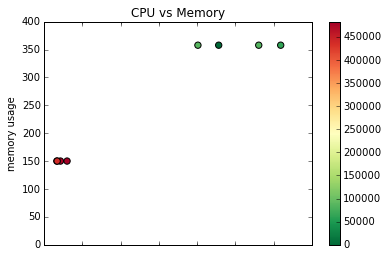

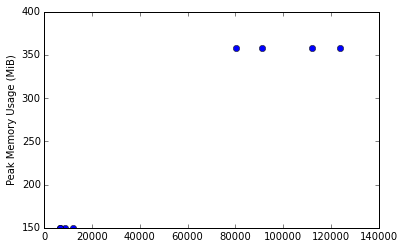

Text(0.5,7.2,u'Simulation Duration (s)')


In [278]:


memory_plot = dfMem.plot('sumatra duration', 'memory usage', kind='scatter',ylim=0, title='CPU vs Memory', c=dfMem['Linf Free Energy'], cmap='RdYlGn_r', s=40)

fig = plt.figure()
axPlot = fig.add_subplot(111, axes = memory_plot.axes)

axPlot.plot(dfMem['sumatra duration'], dfMem['memory usage'],'o')
plt.ylabel('Peak Memory Usage (MiB)')
memory_plot.set_xlabel('Simulation Duration (s)')
memory_plot.axes.set_xlabel('Simulation Duration (s)')
plt.subplots_adjust(bottom=0.15)
# plt.gca().tight_layout()
plt.show()
print memory_plot.axes.xaxis.label
# Energy_N100_L1_graph = temp_frame.plot('elapsed', 'L1', kind='line', ylim=0, c=color, marker='.', 
#                                                title='Free Energy L1 for N = 100', label=key)

In [273]:
?axPlot.plot()

In [267]:
label = 'fafbeb433621'
df.query('(label == "{0}")'.format(label))

with open('memory_peaks.json') as ff:
    memory_data = json.load(ff)
    print memory_data['100']

150.066406


In [155]:
dfC_final

,label,steps,elapsed,nx,ny,c_var_array,cvar_Interpolated_Function,dt,dx,dy,sweeps,L1,L2,Linf,Free_Energy_Interpolated_Function,L1 Free Energy Norms,L2 Free Energy Norms,L-infinite Free Energy Norms
0,fafbeb433621,26,1.0,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,3,24.7367,0.176435,0.00723931,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
1,fafbeb433621,43,5.0,100,100,"[0.538726025473, 0.551850637422, 0.55003077790...",None,0.104952481839,2.0,2.0,3,105.874,0.555187,0.0175756,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
2,fafbeb433621,51,10.0,100,100,"[0.5833090875, 0.601243470851, 0.600634731549,...",None,0.276794734012,2.0,2.0,3,630.079,2.4837,0.0422189,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
3,fafbeb433621,62,20.0,100,100,"[0.592772135132, 0.606466476192, 0.60487321399...",None,0.444615342716,2.0,2.0,3,2031.19,6.41349,0.0907379,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
4,fafbeb433621,107,100.0,100,100,"[0.584911259609, 0.554134101807, 0.50933111079...",None,0.000477116988293,2.0,2.0,3,4785.38,22.5849,0.371876,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
5,fafbeb433621,168,200.0,100,100,"[0.537517884553, 0.504885738303, 0.46325649396...",None,1.96908172607,2.0,2.0,3,6431.18,30.9322,0.379721,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
6,fafbeb433621,291,500.0,100,100,"[0.445400625063, 0.41610932809, 0.388169791056...",None,1.22996861185,2.0,2.0,3,10645.4,47.3346,0.38767,<scipy.interpolate.interpolate.interp1d object...,5.897538e+07,4.680586e+06,535623.528792
7,d88bca02dcc7,26,1.0,100,100,"[0.516982487986, 0.522746851587, 0.52091822429...",None,0.0165294056612,2.0,2.0,2,24.7367,0.176435,0.00723931,<scipy.interpolate.interpolate.interp1d object...,5.762113e+07,4.579282e+06,545832.083483
8,d88bca02dcc7,43,5.0,100,100,"[0.538726112675, 0.551850748491, 0.55003087979...",None,0.104952481839,2.0,2.0,2,105.874,0.555187,0.0175757,<scipy.interpolate.interpolate.interp1d object...,5.762113e+07,4.579282e+06,545832.083483
9,d88bca02dcc7,51,10.0,100,100,"[0.583120426534, 0.6009981981, 0.60039883956, ...",None,0.276794734012,2.0,2.0,2,631.804,2.48869,0.0423026,<scipy.interpolate.interpolate.interp1d object...,5.762113e+07,4.579282e+06,545832.083483


In [31]:
for p in 'N', 'steps', 'sweeps':
    df[p] = df.parameters.map(lambda x: json.loads(x['content'])[p])

In [ ]:
print df['parameters'][0]['content']

In [37]:
df['Free Energy']=results['10x1']['freeEn']
df['elapsed']=results['10x1']['elapsed']

columns.append('Free Energy')
columns.append('elapsed')
df[columns]

,label,N,steps,tags,duration,sweeps,memory,Free Energy,elapsed
0,8f1f49c60b96,10,20,[npzTest],4.042712,2,4648.0,0.786517,0.57275


In [33]:
columns = ['label', 'N', 'steps', 'tags', 'duration', 'sweeps']
print df[columns]

          label   N  steps       tags  duration  sweeps
0  8f1f49c60b96  10     20  [npzTest]  4.042712       2


In [34]:
import numpy as np
import os
num = 0
memoryArray = np.array([])
for num in range(len(df.index)):
    memName = df['output_data'][num][len(df['output_data'][num])-1]['path']
    memlocation = df['datastore'][num]['parameters']['root']
    pool = os.path.join(memlocation, memName)
    memdata = np.loadtxt(pool)
    memoryArray = np.append(memoryArray, memdata)
    print memoryArray
    print ' '
    print num

[ 4648.]
 
0


In [35]:
df['memory']=memoryArray
columns.append('memory')
df[columns]

,label,N,steps,tags,duration,sweeps,memory
0,8f1f49c60b96,10,20,[npzTest],4.042712,2,4648.0


In [38]:
data = {'a' : [1, 2, 3], 'b' : [4, 5, 6]}
pandas.DataFrame(data)

,a,b
0,1,4
1,2,5
2,3,6


In [59]:
data = [{'a' : 1, 'b' : 4}, {'a' : 2, 'b' : 5}, {'a' : 3 ,'b' : 6}]
aa  = pandas.DataFrame(data)

In [60]:
def recalc(row):
    return row.b * 2

In [61]:
print aa

   a  b
0  1  4
1  2  5
2  3  6


In [ ]:
aa['c'] = [recalc(row) for index, row in aa.iterrows()]
print aa

In [73]:
times = np.array([0., 1.0, 1.5])
values = times**2


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times, values)

In [ ]:
import numpy as np
np.linspace(0., 100., 1000)

In [83]:
!ls Data/1de38ff12ec7/
import glob
glob.glob('Data/1de38ff12ec7/*.npz')

1a10x1step0.npz  1a10x1step10.npz  1a10x1step20.npz  memory_usage.txt


['Data/1de38ff12ec7/1a10x1step0.npz',
 'Data/1de38ff12ec7/1a10x1step10.npz',
 'Data/1de38ff12ec7/1a10x1step20.npz']

# Outdated codes

In [ ]:
print 'This import takes a while and I dont know why'
from scipy import interpolate as scpinter
#from scipy.interpolate import interp2d as scpinter    
print 'importing done'
def cvarInterp(cvarFrame, Lx = 200.):
    for variables in dfC.iterrows():
        dictt = {}
#         print variables
        nx = variables[1]['nx']
        ny = variables[1]['ny']
        m = fp.Grid2D(nx = nx, ny= ny, dx=Lx / nx, dy=Lx / ny)
        x = m.x
        y = m.y
#         dictt.update({'x':m.x})
#         dictt.update({'y':m.y})
        cvar = variables[1]['c_var_array']
        function = scpinter.interp2d(x, y, cvar, copy=False)
        variables[1]['cvar_Interpolated_Function'] = function #set the interpolated function into the dataframe column
cvarInterp(dfC)

In [ ]:
cvar_times = []
#smtfram is the datafram created by sumatra records
#dframe is the table we create from .mpz.npz files because it can have multiple entries for the same simulation in order to compare the concentration values at different times
def CvarCompare(dframe, smtframe, Lx=200):
    L1_cvar_Norms = [] #should these be dictionaries to match with the proper simulation label? 
    L2_cvar_Norms = []
    Linf_cvar_Norms = []
    N_Best = 0
    sweeps_Best = 0
    
    labels = smtframe['label']
    
    times = []
    for x in dframe['elapsed']: times.append(int(x))
    times = list(set(times)) 
    print times
    for x in range(len(times)):
        times[x] = int(times[x]) #a list of the unique times where we sampled c_var
    
    times = [0.5, 1.0, 10.0] #manually entered these because it was crashing when one of the times was 0.5 seconds and rounding to 0
    print times
    
    L1_cvar_times = dict(('L1_cvar_time_{0}'.format(time), []) for time in times)
    L2_cvar_times = dict(('L2_cvar_time_{0}'.format(time), []) for time in times)
    Linf_cvar_times = dict(('Linf_cvar_time_{0}'.format(time), []) for time in times)

    print 'L1: '
    print L1_cvar_times
    print 'L2: '
    print L2_cvar_times
    print 'Linf: '
    print Linf_cvar_times
    #first we need to figure out which is the finest grid to set it as the standard of comparison
    for row in dframe.iterrows():
        if row[1]['nx']>N_Best and row[1]['sweeps']>sweeps_Best:
            Best_cvar_function = row[1]['cvar_Interpolated_Function']
            N_Best = row[1]['nx']
            sweeps_Best = row[1]['sweeps']
    #now for every sumatra label, go thorugh the dframe, and make lists for each norm and each sampled time 
    for label in labels:
        for row in dframe.iterrows():  
            if row[1]['label']==label:
                cvar_function = row[1]['cvar_Interpolated_Function']
                elapsed = row[1]['elapsed']
                nx = row[1]['nx']
                ny = row[1]['ny']
                m = fp.Grid2D(nx = nx, ny= ny, dx=Lx / nx, dy=Lx / ny)
                x = m.x
                y = m.y
                diff = np.absolute(cvar_function(x,y) - Best_cvar_function(x,y))
                
                L1_cvar_times['L1_cvar_time_{0}'.format(elapsed)].append(np.linalg.norm(diff,1))
                L2_cvar_times['L2_cvar_time_{0}'.format(elapsed)].append(np.linalg.norm(diff,2))
                Linf_cvar_times['Linf_cvar_time_{0}'.format(elapsed)].append(np.linalg.norm(diff,np.inf))

                
    #add the norms data to the sumatra database as seperate columns             
    for key in L1_cvar_times.keys():
        smtframe[key] = L1_cvar_times[key]
    for key in L2_cvar_times.keys():
        smtframe[key] = L2_cvar_times[key]         
    for key in Linf_cvar_times.keys():
        smtframe[key] = Linf_cvar_times[key]    
                 
    return smtframe
#                 try:
#                     L1_cvar_time_{0}.format(elapsed).append(np.linalg.norm(diff,1))
#                     L2_cvar_time_{0}.format(elapsed).append(np.linalg.norm(diff,2))
#                     L3_cvar_time_{0}.format(elapsed).append(np.linalg.norm(diff,3))
#                 except:
#                     L1_cvar_time_{0}.format(elapsed)=[np.linalg.norm(diff,1)]
#                     L2_cvar_time_{0}.format(elapsed)=[np.linalg.norm(diff,2)]
#                     L3_cvar_time_{0}.format(elapsed)=[np.linalg.norm(diff,3)]
#     for x in times:
#         smtframe['L1_cvar_time_{0}'.format(x)] = L1_cvar_time_{0}.format(x)
#         smtframe['L2_cvar_time_{0}'.format(x)] = L2_cvar_time_{0}.format(x)
#         smtframe['L3_cvar_time_{0}'.format(x)] = L3_cvar_time_{0}.format(x)
 
        
#     smtframe['L1 cvar Norms time:{0}'] = L1Norms
#     smtframe['L2 Norms'] = L2Norms
#     smtframe['L-infinite Norms'] = LinfNorms
#     return True
                 
CvarCompare(dfC, df)

In [ ]:

#to check why my free energy norms were 0 for all 400 grid sims
test_dict.keys()
math = []
print test_dict['7eff0b0d7455']['energy']
print ' '
print test_dict['d5ba58775177']['energy']
print '='*100
print test_dict['7eff0b0d7455']['elapsed']
print ' '
print test_dict['d5ba58775177']['elapsed']

print ' '
for x in xrange(len(test_dict['7eff0b0d7455']['elapsed'])):
    print 'diff = ', test_dict['7eff0b0d7455']['elapsed'][x] - test_dict['d5ba58775177']['elapsed'][x]
    
print '='*100
for x in xrange(len(test_dict['7eff0b0d7455']['energy'])):
    print 'energy diff = ', test_dict['7eff0b0d7455']['energy'][x] - test_dict['d5ba58775177']['energy'][x]
    math.append(float(test_dict['7eff0b0d7455']['energy'][x] - test_dict['d5ba58775177']['energy'][x]))
# dfC_final

print math
print (sum(math))